## Logistic regression simple practice 
- Binary Classify

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Load dataset from sklearn

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

x_org, y_org = iris.data, iris.target
print('Orginal data shape：{}, Label data shape：{}'.format(x_org.shape, y_org.shape))

Orginal data shape：(150, 4), Label data shape：(150,)


In [3]:
# only classify "Setosa" and "Versicolour", so choose 100 of datasets
# only choose sepal_length and sepal_width as features
x_data, y_data = iris.data[:100, :2], iris.target[:100]
print('Data shape of input and label:', x_data.shape, y_data.shape)

Data shape of input and label: (100, 2) (100,)


In [4]:
x_data = np.insert(x_data, 0, 1.0, axis=1)
print('insert dummy variable', x_data.shape)

insert dummy variable (100, 3)


In [5]:
# Split the dataset to training and validation set, also doing shuffle.

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=123)
# x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)
print("shape of x_train:", x_train.shape)
print("shape of x_test :", x_test.shape )
print("shape of y_train:", y_train.shape)
print("shape of y_test :", y_test.shape )

shape of x_train: (70, 3)
shape of x_test : (30, 3)
shape of y_train: (70,)
shape of y_test : (30,)


### Plot the training datasets

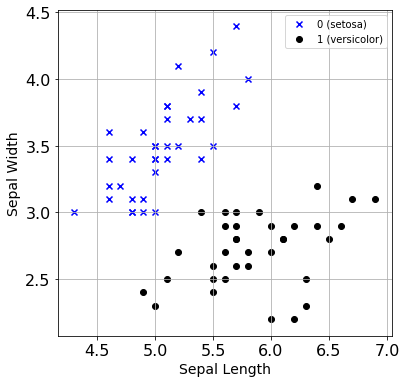

In [6]:
x_t0 = x_train[y_train == 0]
x_t1 = x_train[y_train == 1]

plt.figure(figsize=(6,6))
plt.scatter(x_t0[:,1], x_t0[:,2], marker='x', c='b', label='0 (setosa)')
plt.scatter(x_t1[:,1], x_t1[:,2], marker='o', c='k', label='1 (versicolor)')
plt.xlabel('Sepal Length', fontsize=14)
plt.ylabel('Sepal Width',  fontsize=14)
plt.xticks(size=16)
plt.yticks(size=16)
plt.legend()
plt.grid(True)
plt.show()

### function define

In [7]:
def sigmoid(x):
    return 1/(1+ np.exp(-x))

def predict_(x, w):
    return sigmoid(np.dot(x, w))
#     return sigmoid(x@w)

# def cross_entropy(yt, yp):
#     ce = -(yt * np.log(yp) + (1 - yt) * np.log(1 - yp))
#     return(np.mean(ce)) 

def cross_entropy(yt, yp):
    return -np.mean(np.sum(yt * np.log(yp)))

def classify_result(y):
    return np.where(y<0.5, 0, 1)

In [8]:
from sklearn.metrics import accuracy_score

def evaluate(x, y_label, weight):
    pred_y = predict_(x, weight)
    
    loss = cross_entropy(y_label, pred_y)
    pred_y_class = classify_result(pred_y)
    
    score = accuracy_score(y_label, pred_y_class)
    return loss, score

In [9]:
def train(x_train, y_train, x_test, y_test, lr, iteration):
    num_data = x_train.shape[0]
    dim_data = x_train.shape[1]
    
    # intizlize weight and loss repository
    weight = np.ones(dim_data)
    loss_repos = np.zeros((0, dim_data))
    
    for k in range(iteration):
        pred_y = predict_(x_train, weight)
        err = pred_y - y_train
        weight = weight - lr * np.dot(x_train.T, err) / num_data
    
        if( k % 10 == 0):
            loss, score = evaluate(x_test, y_test, weight)
            loss_repos = np.vstack((loss_repos, np.array([k, loss, score])))
            print( "iteration = %d  loss = %f score = %f" % (k, loss, score))
        
    return loss_repos, weight

In [10]:
# Set epoch and iteration
iteration = 10000
learning_rate = 0.01

In [11]:
loss_set, update_weight = train(x_train, y_train, x_test, y_test, learning_rate, iteration)

iteration = 0  loss = 0.001275 score = 0.500000
iteration = 10  loss = 0.008749 score = 0.500000
iteration = 20  loss = 0.062325 score = 0.500000
iteration = 30  loss = 0.439878 score = 0.500000
iteration = 40  loss = 2.405411 score = 0.500000
iteration = 50  loss = 6.413498 score = 0.500000
iteration = 60  loss = 9.231650 score = 0.500000
iteration = 70  loss = 10.366099 score = 0.333333
iteration = 80  loss = 10.709865 score = 0.200000
iteration = 90  loss = 10.758970 score = 0.166667
iteration = 100  loss = 10.705605 score = 0.133333
iteration = 110  loss = 10.618068 score = 0.166667
iteration = 120  loss = 10.519981 score = 0.200000
iteration = 130  loss = 10.419425 score = 0.200000
iteration = 140  loss = 10.319140 score = 0.266667
iteration = 150  loss = 10.220044 score = 0.300000
iteration = 160  loss = 10.122428 score = 0.366667
iteration = 170  loss = 10.026375 score = 0.433333
iteration = 180  loss = 9.931894 score = 0.500000
iteration = 190  loss = 9.838970 score = 0.566667


iteration = 2430  loss = 3.449326 score = 0.966667
iteration = 2440  loss = 3.441501 score = 0.966667
iteration = 2450  loss = 3.433728 score = 0.966667
iteration = 2460  loss = 3.426006 score = 0.966667
iteration = 2470  loss = 3.418335 score = 0.966667
iteration = 2480  loss = 3.410715 score = 0.966667
iteration = 2490  loss = 3.403145 score = 0.966667
iteration = 2500  loss = 3.395624 score = 0.966667
iteration = 2510  loss = 3.388153 score = 0.966667
iteration = 2520  loss = 3.380730 score = 0.966667
iteration = 2530  loss = 3.373355 score = 0.966667
iteration = 2540  loss = 3.366027 score = 0.966667
iteration = 2550  loss = 3.358747 score = 0.966667
iteration = 2560  loss = 3.351513 score = 0.966667
iteration = 2570  loss = 3.344326 score = 0.966667
iteration = 2580  loss = 3.337184 score = 0.966667
iteration = 2590  loss = 3.330088 score = 0.966667
iteration = 2600  loss = 3.323037 score = 0.966667
iteration = 2610  loss = 3.316030 score = 0.966667
iteration = 2620  loss = 3.3090

iteration = 5370  loss = 2.277902 score = 0.966667
iteration = 5380  loss = 2.275851 score = 0.966667
iteration = 5390  loss = 2.273806 score = 0.966667
iteration = 5400  loss = 2.271767 score = 0.966667
iteration = 5410  loss = 2.269736 score = 0.966667
iteration = 5420  loss = 2.267710 score = 0.966667
iteration = 5430  loss = 2.265691 score = 0.966667
iteration = 5440  loss = 2.263678 score = 0.966667
iteration = 5450  loss = 2.261672 score = 0.966667
iteration = 5460  loss = 2.259671 score = 0.966667
iteration = 5470  loss = 2.257677 score = 0.966667
iteration = 5480  loss = 2.255690 score = 0.966667
iteration = 5490  loss = 2.253708 score = 0.966667
iteration = 5500  loss = 2.251733 score = 0.966667
iteration = 5510  loss = 2.249764 score = 0.966667
iteration = 5520  loss = 2.247801 score = 0.966667
iteration = 5530  loss = 2.245843 score = 0.966667
iteration = 5540  loss = 2.243893 score = 0.966667
iteration = 5550  loss = 2.241948 score = 0.966667
iteration = 5560  loss = 2.2400

iteration = 8380  loss = 1.856145 score = 0.966667
iteration = 8390  loss = 1.855179 score = 0.966667
iteration = 8400  loss = 1.854215 score = 0.966667
iteration = 8410  loss = 1.853253 score = 0.966667
iteration = 8420  loss = 1.852293 score = 0.966667
iteration = 8430  loss = 1.851335 score = 0.966667
iteration = 8440  loss = 1.850378 score = 0.966667
iteration = 8450  loss = 1.849424 score = 0.966667
iteration = 8460  loss = 1.848471 score = 0.966667
iteration = 8470  loss = 1.847520 score = 0.966667
iteration = 8480  loss = 1.846572 score = 0.966667
iteration = 8490  loss = 1.845625 score = 0.966667
iteration = 8500  loss = 1.844679 score = 0.966667
iteration = 8510  loss = 1.843736 score = 0.966667
iteration = 8520  loss = 1.842795 score = 0.966667
iteration = 8530  loss = 1.841855 score = 0.966667
iteration = 8540  loss = 1.840917 score = 0.966667
iteration = 8550  loss = 1.839981 score = 0.966667
iteration = 8560  loss = 1.839047 score = 0.966667
iteration = 8570  loss = 1.8381

In [12]:
print('First epoch result: Loss:{:f}, Accur：{:f}'.format(loss_set[0,1], loss_set[0,2]))
print('Final epoch result: Loss:{:f}, Accur：{:f}'.format(loss_set[-1,1], loss_set[-1,2]))

First epoch result: Loss:0.001275, Accur：0.500000
Final epoch result: Loss:1.721686, Accur：0.966667


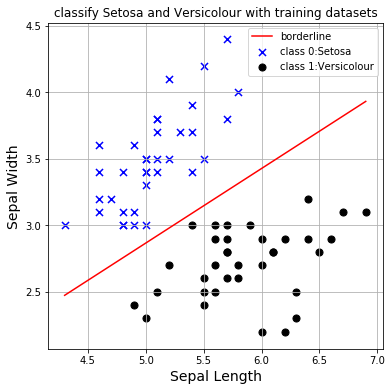

In [13]:
# plot the bord line
def cal_x2(x, w):
    return(-(w[0] + w[1] * x)/ w[2])

# for traininr figure
x_train0 = x_train[y_train==0]
x_train1 = x_train[y_train==1]

# find the max & min of x1
xl_train = np.asarray([x_train[:,1].min(), x_train[:,1].max()])
yl_train = cal_x2(xl_train, update_weight)

plt.figure(figsize=(6,6))
plt.title('classify Setosa and Versicolour with training datasets')
plt.scatter(x_train0[:,1], x_train0[:,2], marker='x', c='b', s=50, label='class 0:Setosa')
plt.scatter(x_train1[:,1], x_train1[:,2], marker='o', c='k', s=50, label='class 1:Versicolour')
plt.plot(xl_train, yl_train, c='r', label='borderline')
plt.xlabel('Sepal Length', fontsize=14)
plt.ylabel('Sepal Width', fontsize=14)
plt.xticks()
plt.yticks()
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# for test figure
x_test0 = x_test[y_test==0]
x_test1 = x_test[y_test==1]

# plot the bord line
def cal_x2(x, w):
    return(-(w[0] + w[1] * x)/ w[2])

# # find the max & min of x1
xl_test = np.asarray([x_test[:,1].min(), x_test[:,1].max()])
yl_test = cal_x2(xl_test, update_weight)

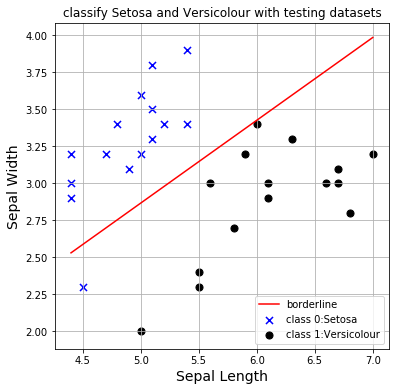

In [15]:
plt.figure(figsize=(6,6))
plt.title('classify Setosa and Versicolour with testing datasets')

plt.scatter(x_test0[:,1], x_test0[:,2], marker='x', c='b', s=50, label='class 0:Setosa')
plt.scatter(x_test1[:,1], x_test1[:,2], marker='o', c='k', s=50, label='class 1:Versicolour')

plt.plot(xl_test, yl_test, c='r', label='borderline')
plt.xlabel('Sepal Length', fontsize=14)
plt.ylabel('Sepal Width', fontsize=14)
plt.xticks()
plt.yticks()
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


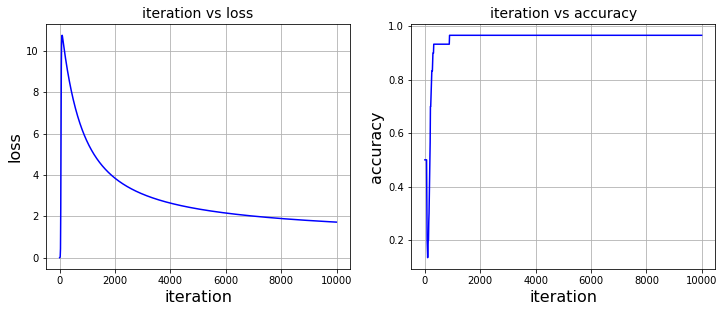

In [16]:
xmin, xmax, num = 0.01, 10, 100      
x = np.linspace(xmin, xmax, num)     

# 建立繪圖物件 fig, 大小為 12 * 4.5, 內有 1 列 2 欄的小圖, 兩圖共用 x 軸和 y 軸
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4.5))

ax1.plot(loss_set[:,0], loss_set[:,1], 'b')
ax1.set_title('iteration vs loss', fontsize=14)
ax1.set_xlabel('iteration', fontsize = 16)
ax1.set_ylabel('loss', fontsize = 16)
ax1.grid(True)

ax2.plot(loss_set[:,0], loss_set[:,2], 'b')
ax2.set_title('iteration vs accuracy', fontsize=14)
ax2.set_xlabel('iteration', fontsize = 16)
ax2.set_ylabel('accuracy',  fontsize = 16)
ax2.grid(True)

fig.show()

### better?

In [17]:
# Set epoch and iteration
iteration = 1000
learning_rate = 0.01

def train_ver2(x_train, y_train, x_test, y_test, lr, iteration):
    num_data = x_train.shape[0]
    dim_data = x_train.shape[1]
    finish_flag = 0
    # intizlize weight and loss repository
    weight = np.ones(dim_data)
    loss_repos = np.zeros((0, dim_data))
    
    for k in range(iteration):
        pred_y = predict_(x_train, weight)
        err = pred_y - y_train
        weight = weight - lr * np.dot(x_train.T, err) / num_data
    
        if( k % 10 == 0):
            loss, score = evaluate(x_test, y_test, weight)
            loss_repos = np.vstack((loss_repos, np.array([k, loss, score])))
            print( "iteration = %d  loss = %f score = %f" % (k, loss, score))
        if(k==999)and(score==1.0): 
            finish_flag = 1
            break
        
    return loss_repos, weight, finish_flag

In [18]:
for epoch in range(20):
    print(">> {} th epoch：".format(epoch))
    random_seed = np.random.randint(1, 200)
    print(">> Random seed".format(random_seed))
    x_train_ver2, x_test_ver2, y_train_ver2, y_test_ver2 = train_test_split(x_data, y_data, test_size=0.3, random_state=random_seed)
    loss_set_ver2, update_weight_ver2, flag = train_ver2(x_train_ver2, y_train_ver2, x_test_ver2, y_test_ver2, learning_rate, iteration)
    print("------------------------------------------")
    if(flag):
        print("Find the accuracy score = 1.0 !! in {}th epoch with random seed:{}".format(epoch, random_seed))
        break

>> 0 th epoch：
>> Random seed
iteration = 0  loss = 0.001574 score = 0.566667
iteration = 10  loss = 0.012088 score = 0.566667
iteration = 20  loss = 0.094069 score = 0.566667
iteration = 30  loss = 0.698587 score = 0.566667
iteration = 40  loss = 3.655255 score = 0.566667
iteration = 50  loss = 8.623639 score = 0.566667
iteration = 60  loss = 11.596282 score = 0.400000
iteration = 70  loss = 12.701936 score = 0.033333
iteration = 80  loss = 13.005373 score = 0.033333
iteration = 90  loss = 13.016951 score = 0.033333
iteration = 100  loss = 12.927890 score = 0.066667
iteration = 110  loss = 12.805618 score = 0.100000
iteration = 120  loss = 12.673448 score = 0.166667
iteration = 130  loss = 12.539367 score = 0.233333
iteration = 140  loss = 12.406090 score = 0.300000
iteration = 150  loss = 12.274522 score = 0.366667
iteration = 160  loss = 12.144949 score = 0.400000
iteration = 170  loss = 12.017445 score = 0.500000
iteration = 180  loss = 11.892011 score = 0.533333
iteration = 190  l

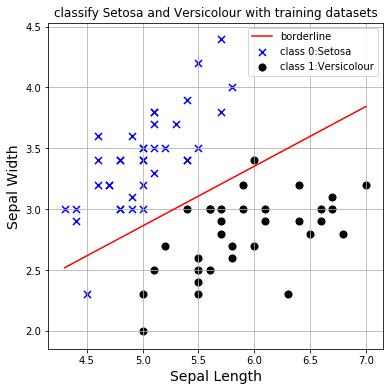

In [19]:
# for training figure
x_train_ver20 = x_train_ver2[y_train_ver2==0]
x_train_ver21 = x_train_ver2[y_train_ver2==1]

# # find the max & min of x1
xl_train_ver2 = np.asarray([x_train_ver2[:,1].min(), x_train_ver2[:,1].max()])
yl_train_ver2 = cal_x2(xl_train_ver2, update_weight_ver2)

plt.figure(figsize=(6,6))
plt.title('classify Setosa and Versicolour with training datasets')
plt.scatter(x_train_ver20[:,1], x_train_ver20[:,2], marker='x', c='b', s=50, label='class 0:Setosa')
plt.scatter(x_train_ver21[:,1], x_train_ver21[:,2], marker='o', c='k', s=50, label='class 1:Versicolour')
plt.plot(xl_train_ver2, yl_train_ver2, c='r', label='borderline')
plt.xlabel('Sepal Length', fontsize=14)
plt.ylabel('Sepal Width', fontsize=14)
plt.xticks()
plt.yticks()
plt.legend()
plt.grid(True)
plt.show()

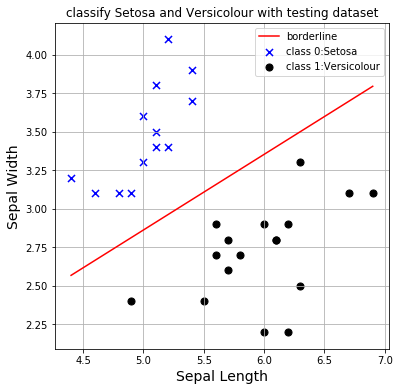

In [20]:
# for test figure
x_test_ver20 = x_test_ver2[y_test_ver2==0]
x_test_ver21 = x_test_ver2[y_test_ver2==1]

# # find the max & min of x1
xl_test_ver2 = np.asarray([x_test_ver2[:,1].min(), x_test_ver2[:,1].max()])
yl_test_ver2 = cal_x2(xl_test_ver2, update_weight_ver2)

plt.figure(figsize=(6,6))
plt.title('classify Setosa and Versicolour with testing dataset')

plt.scatter(x_test_ver20[:,1], x_test_ver20[:,2], marker='x', c='b', s=50, label='class 0:Setosa')
plt.scatter(x_test_ver21[:,1], x_test_ver21[:,2], marker='o', c='k', s=50, label='class 1:Versicolour')

plt.plot(xl_test_ver2, yl_test_ver2, c='r', label='borderline')
plt.xlabel('Sepal Length', fontsize=14)
plt.ylabel('Sepal Width', fontsize=14)
plt.xticks()
plt.yticks()
plt.legend()
plt.grid(True)
plt.show()

### Bonus：Show in 3D plot

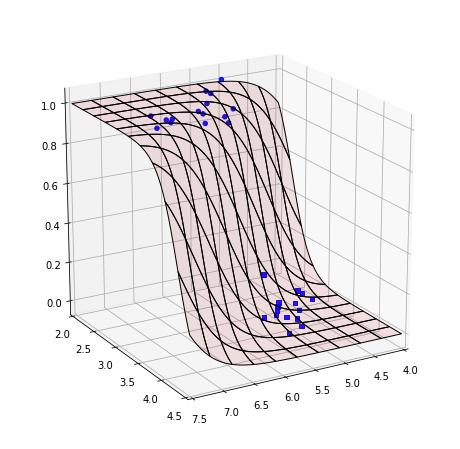

In [21]:
from mpl_toolkits.mplot3d import Axes3D
x1 = np.linspace(4, 7.5, 100)
x2 = np.linspace(2, 4.5, 100)

xx1, xx2 = np.meshgrid(x1, x2) # Return coordinate matrices from coordinate vectors.
xxx = np.asarray([np.ones(xx1.ravel().shape), xx1.ravel(), xx2.ravel()]).T
c = predict_(xxx, update_weight).reshape(xx1.shape)
plt.figure(figsize=(8,8))
ax = plt.subplot(1, 1, 1, projection='3d')
ax.plot_surface(xx1, xx2, c, color='red', edgecolor='black', rstride=10, cstride=10, alpha=0.1)
ax.scatter(x_test1[:, 1], x_test1[:, 2], 1, s=20, alpha=0.9, marker='o', c='b')
ax.scatter(x_test0[:, 1], x_test0[:, 2], 0, s=20, alpha=0.9, marker='s', c='b')
ax.set_xlim(4, 7.5) # axis limit
ax.set_ylim(2, 4.5)
ax.view_init(elev=20, azim=60)

### Use scikit-learn
- [link](https://scikit-learn.org/stable/index.html)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [23]:
# Generate model：Logistic regression & SVM
model_lr  = LogisticRegression (solver='liblinear')
model_svm = svm.SVC (kernel='linear')

In [24]:
#calculate
model_lr.fit (x_train, y_train)
model_svm.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [25]:
# LR

lr_w0 = model_lr.intercept_[0] # 截距, 1×3 matrix
# x1(sepal_length) 
lr_w1 = model_lr.coef_[0, 1]   # 斜率, 2x3 matrix
# x2(sepal_width) 
lr_w2 = model_lr.coef_[0, 2]

# SVM

svm_w0 = model_svm.intercept_[0]
# x1(sepal_length) 
svm_w1 = model_svm.coef_[0, 1]
# x2(sepal_width) 
svm_w2 = model_svm.coef_[0, 2]

In [26]:
#find x2
def rl(x):
    x2 = -(lr_w0 + lr_w1 * x)/lr_w2
    return(x2)

def svm(x):
    x2 = -(svm_w0 + svm_w1 * x)/svm_w2
    return(x2)

In [27]:
y_rl  = rl(xl_test)
y_svm = svm(xl_test)
print(xl_test, yl_test, y_rl, y_svm)

[4.4 7. ] [2.52956949 3.98656294] [2.56330832 4.11970744] [2.26552651 4.51214996]


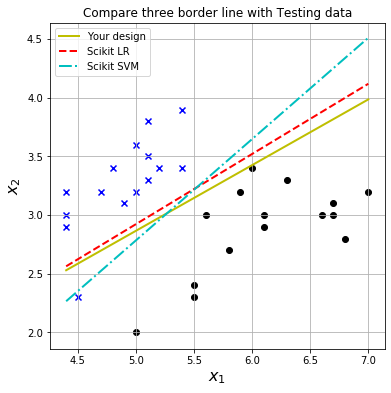

In [28]:
# plot scatter figure with border line
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
plt.title('Compare three border line with Testing data')
plt.scatter(x_test0[:,1], x_test0[:,2], marker='x', c='b')
plt.scatter(x_test1[:,1], x_test1[:,2], marker='o', c='k')

ax.plot(xl_test, yl_test, linewidth=2, c='y', label='Your design')
ax.plot(xl_test, y_rl,    linewidth=2, c='r', linestyle="--", label='Scikit LR')
ax.plot(xl_test, y_svm,   linewidth=2, c='c', linestyle="-.", label='Scikit SVM')

ax.legend()
ax.set_xlabel('$x_1$', fontsize=16)
ax.set_ylabel('$x_2$', fontsize=16)
plt.grid(True)
plt.show()